In [4]:
#This notebook requires the file overall_data.db

In [5]:
%matplotlib notebook  

In [6]:
#Import everything that will be needed
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mpl
from matplotlib.animation import FuncAnimation
import numpy as np
import ipywidgets as ipyw

In [7]:
con = sql.connect("overall_data.db")    # Connect to database and create cursor
cur = con.cursor()  

def getdata_country(year, things_to_get): # Create a function that gets data for certain country
    things = ', '.join(things_to_get)
    Query=f"SELECT {things} FROM newdata WHERE Year='{year}'"   # Query a column from our table with a statement eg "WHERE Country='Algeria"
    # print (Query)
    cur.execute(Query)
    data= cur.fetchall()   # Fetches all rows from the column and puts it in a variable   
    return np.array(data).T  #outputs the data as a numpy array, transposed (.T) to easier separate the individual variables


In [8]:
data = getdata_country(2000, ['Country', 'fossil_fuels' ,'population', 'gdp'])
newdata1= data[1].astype(float)
newdata2= data[2].astype(float)
newdata3= data[3].astype(float)

<IPython.core.display.Javascript object>


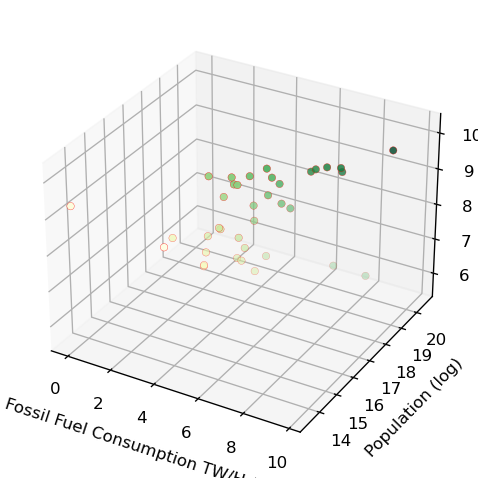

interactive(children=(FloatSlider(value=1970.0, description='Year', max=2020.0, min=1970.0, step=1.0), Output(…

In [9]:
fig1 = plt.figure(figsize=(4,4))
ax1 = fig1.add_subplot(projection='3d')

line = (np.log(newdata2), np.log(newdata1), np.divide((newdata3),(newdata2))) #Set the plot of the data to an object

    
def update(Year): #Create update function to update the
    ax1.clear()
    data = getdata_country(Year, ['Country', 'fossil_fuels', 'population', 'gdp'])
    newdata1= data[1].astype(float)
    newdata2= data[2].astype(float)
    newdata3= data[3].astype(float)
    
    
    ax1.scatter(np.log(newdata1), np.log(newdata2), np.log(np.divide(newdata3, newdata2)), c=np.log(newdata3), cmap='YlGn', linewidth=0.2, edgecolor='red')
        
    ax1.set_xlabel('Fossil Fuel Consumption TW/H (log)')
    ax1.set_ylabel('Population (log)')
    ax1.set_zlabel('GDP per capita (log)')
    plt.tight_layout()
    
    fig1.canvas.draw()
    
# create a dropdown menu    
FloatSlider = ipyw.widgets.FloatSlider(min=1970, max=2020, step=1, value=1970)

#enable the interaction
ipyw.interact(update, Year=FloatSlider);



In [ ]:
fig1 = plt.figure(figsize=(4,4))
ax1 = fig1.add_subplot(projection='3d')

line = (np.log(newdata2), np.log(newdata1), np.divide((newdata3),(newdata2))) #Set the plot of the data to an object

    
def update(Year): #Create update function to update the
    ax1.clear()
    data = getdata_country(Year, ['Country', 'fossil_fuels', 'population', 'gdp'])
    newdata1= data[1].astype(float)
    newdata2= data[2].astype(float)
    newdata3= data[3].astype(float)
    
    
    ax1.scatter(np.log(newdata1), np.log(newdata2), np.log(np.divide(newdata3, newdata2)), c=np.log(newdata3), cmap='YlGn', linewidth=0.2, edgecolor='red')
        
    ax1.set_xlabel('Fossil Fuel Consumption TW/H (log)')
    ax1.set_ylabel('Population (log)')
    ax1.set_zlabel('GDP per capita (log)')
    plt.tight_layout()
    
    fig1.canvas.draw()
    
# create a dropdown menu    
FloatSlider = ipyw.widgets.FloatSlider(min=1970, max=2020, step=1, value=1970)

#enable the interaction


play = ipyw.widgets.Play(
    value=1970,
    min=1970,
    max=2020,
    step=1,
    interval=1,
    description="Press play",
    disabled=False
)

slider = ipyw.widgets.IntSlider()
newslider=ipyw.widgets.jslink((play, 'value'), (slider, 'value'))
newslider= ipyw.widgets.HBox([play, slider])

ipyw.interact(update, Year=play);

<IPython.core.display.Javascript object>